In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
#changing the working directory
%cd /content/gdrive/MyDrive/GOOGLE_COLLAB_NIK/Assignment/COVID_19_CT_Data
#Check the present working directory using pwd command

/content/gdrive/MyDrive/GOOGLE_COLLAB_NIK/Assignment/COVID_19_CT_Data


In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('C:/Users/Rakeshwar/Documents/Traffic_mini_project/dataset2')   #path where tha dataset are residing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [133]:
import cv2,os

data_path='/content/gdrive/MyDrive/GOOGLE_COLLAB_NIK/Assignment/COVID_19_CT_Data/Train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'COVID': 0, 'non-COVID': 1}
['COVID', 'non-COVID']
[0, 1]


In [134]:
img_size=30
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            #gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [135]:
import numpy as np

data=np.array(data)/255.0
#data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)


In [136]:
print(data.shape, target.shape)

(1400, 30, 30, 3) (1400,)


In [137]:
#os.mkdir('training')    #making training folder in current directory #not

np.save('./training/data',data)
np.save('./training/target',target)

In [138]:
import numpy as np

data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [139]:
ls

'different model from github '/   Model3.ipynb   Train/
 model1-2.ipynb                   Test/          training/
 model2.ipynb                     testing/       Untitled0.ipynb


In [140]:
print(data.shape, labels.shape)

(1400, 30, 30, 3) (1400,)


In [141]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=0)

In [142]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1260, 30, 30, 3) (140, 30, 30, 3) (1260,) (140,)


In [143]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [144]:
from keras.regularizers import l2


In [145]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
#model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2, activation = 'sigmoid'))
# We have 2 classes that's why we have defined 2 in the dense
#model.add(Dense(2, activation='softmax'))


In [146]:
#Compilation of the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1152)            

In [147]:
epochs = 100
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/100
40/40 [==============================] - 2s 36ms/step - loss: 0.7121 - accuracy: 0.4754 - val_loss: 0.6887 - val_accuracy: 0.4857
Epoch 2/100
40/40 [==============================] - 1s 32ms/step - loss: 0.6661 - accuracy: 0.6339 - val_loss: 0.6278 - val_accuracy: 0.7429
Epoch 3/100
40/40 [==============================] - 1s 32ms/step - loss: 0.6413 - accuracy: 0.6420 - val_loss: 0.5565 - val_accuracy: 0.7929
Epoch 4/100
40/40 [==============================] - 1s 32ms/step - loss: 0.5660 - accuracy: 0.7013 - val_loss: 0.5310 - val_accuracy: 0.8143
Epoch 5/100
40/40 [==============================] - 1s 31ms/step - loss: 0.5468 - accuracy: 0.7337 - val_loss: 0.4781 - val_accuracy: 0.8071
Epoch 6/100
40/40 [==============================] - 1s 32ms/step - loss: 0.5231 - accuracy: 0.7362 - val_loss: 0.4746 - val_accuracy: 0.8429
Epoch 7/100
40/40 [==============================] - 1s 31ms/step - loss: 0.4927 - accuracy: 0.7579 - val_loss: 0.4607 - val_accuracy: 0.7643
Epoch 

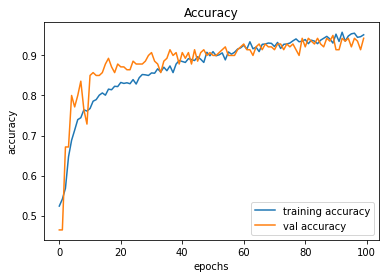

In [123]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

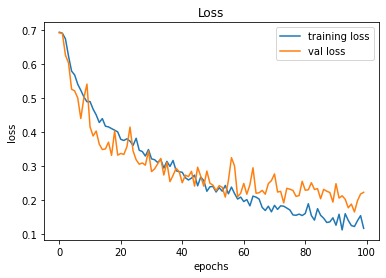

In [124]:
#Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [125]:
print(model.evaluate(X_test,y_test ))

5/5 [==============================] - 0s 16ms/step - loss: 0.2224 - accuracy: 0.9429
[0.22237034142017365, 0.9428571462631226]


In [126]:
# preparation for the testing

import cv2,os

data_pathT='/content/gdrive/MyDrive/GOOGLE_COLLAB_NIK/Assignment/COVID_19_CT_Data/Test'
categoriesT=os.listdir(data_pathT)
labelsT=[i for i in range(len(categoriesT))]

label_dictT=dict(zip(categoriesT,labelsT)) #empty dictionary

print(label_dictT)
print(categoriesT)
print(labelsT)

{'COVID': 0, 'non-COVID': 1}
['COVID', 'non-COVID']
[0, 1]


In [105]:
#testing the model

img_size=30
dataT=[]
targetT=[]


for category in categoriesT:
    folder_pathT=os.path.join(data_pathT,category)
    img_namesT=os.listdir(folder_pathT)
        
    for img_name in img_namesT:
        img_pathT=os.path.join(folder_pathT,img_name)
        imgT=cv2.imread(img_pathT)

        try:
            #gray=cv2.cvtColor(imgT,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resizedT=cv2.resize(imgT,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            dataT.append(resizedT)
            targetT.append(label_dictT[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np

dataT=np.array(dataT)/255.0
#dataT=np.reshape(dataT,(dataT.shape[0],img_size,img_size,1))
targetT=np.array(targetT)

from keras.utils import np_utils

#new_target=np_utils.to_categorical(target)

In [ ]:
#os.mkdir('training')    #making training folder in current directory #not

np.save('./testing/dataT',dataT)
np.save('./testing/targetT',targetT)

In [127]:
import numpy as np

X_test=np.load('./testing/dataT.npy')
label=np.load('./testing/targetT.npy')

In [128]:
Y_pred = model.predict_classes(X_test)   #this is going the predict the class of each images belonging to test set
Y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [129]:
#accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.6006825938566553


In [79]:
# for the confusion metrix and classification report

from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(label, Y_pred))



[[201 101]
 [ 66 218]]


In [80]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(label, Y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.753     0.666     0.707       302
           1      0.683     0.768     0.723       284

    accuracy                          0.715       586
   macro avg      0.718     0.717     0.715       586
weighted avg      0.719     0.715     0.715       586

